In [1]:
import spotipy
import pandas as pd 
import time 
import numpy as np
import matplotlib as plt
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import math

## Loading Data

In [2]:
## Load spotify Regular Songs data  
## for features comparison 
df_all = pd.read_csv('genres_v2 2.csv')

## Load spotify top songs from 1921 to 2020 
## for time series anaylsis
time_series = pd.read_csv('spotify1921-2020.csv')

## Load soptify top 50 songs 
spotify = pd.read_csv('spotify_API.csv')

## Load tiktok top 100 songs 
tiktok = pd.read_csv('tiktok_API.csv')

## Load billboard top 100 songs 
billboard = pd.read_csv('billboard_API.csv')

/Users/chuyangchen/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Creating Helper Functions for Data Cleaning 

In [3]:
## get normalized features from a given dataframe 

def get_feature(data):   
    feature = data.drop(data.columns[[0,1,2,3,4,5,6,-1]], axis = 1)
    no_feature = data.drop(list(feature.columns),axis=1)
    
    feature_normalized = (feature-feature.min())/(feature.max()-feature.min())
    return feature_normalized

In [4]:
## normalize a given dataframe 

## so that For every feature, the minimum value of that feature gets transformed into a 0, 
## the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1

def normalizer(data):
    feature = data.drop(data.columns[[0,1,2,3,4,5,6,-1]], axis = 1)
    no_feature = data.drop(list(feature.columns),axis=1)
    
    feature_normalized = (feature-feature.min())/(feature.max()-feature.min())                                    
    data_normalized = pd.concat([no_feature, feature_normalized], axis = 1)   
    return data_normalized

In [5]:
### combining similar genre 

def genre_cluster(df):                                      # returning a list of combined genre
    
    genre_list = list(df['Genre'])
    
    for idx, genre in enumerate(genre_list):
        if 'pop' in genre:
            genre_list[idx] = 'pop'
        elif 'rock' in genre:
            genre_list[idx] = 'rock'
        elif 'hip hop' in genre:
            genre_list[idx] = 'hip hop'    
        elif 'rap' in genre:
            genre_list[idx] = 'rap'  
        elif 'r&b' in genre:
            genre_list[idx] = 'r&b'  
    return genre_list
                    
def genre_list_to_dataframe(genre_list, df):                  # put the list above into target dataframe
    genre_df = pd.DataFrame(genre_list)
    genre_df.rename(columns={0:'Genre'}, inplace=True)
    df.drop(df.columns[3], axis = 1,inplace=True)
    combined = pd.concat([df,genre_df], axis=1)
    return combined 

In [6]:
## detect all the Genre that is blank, and name them 'Unknown'
## please put a LIST here!!! 

def Unknown_Genre_Detector(genre_list):
    for idx, i in enumerate(genre_list):
        if len(i) == 0:
            genre_list[idx] = 'Unknown'


In [7]:
## Get rid of the blank genres
spotify = spotify[spotify['Genre'].notnull()]
tiktok = tiktok[tiktok['Genre'].notnull()]
billboard = billboard[billboard['Genre'].notnull()]
spotify.drop(columns='Unnamed: 0', inplace=True)
tiktok.drop(columns='Unnamed: 0', inplace=True)
billboard.drop(columns='Unnamed: 0', inplace=True)

## Spotify Analysis 

In [8]:
## change the column names so two dataset can be matched 

dict = {'danceability':'Danceability', 'energy':'Energy', 'loudness':'Loudness', 'speechiness':'Speechiness','acousticness':'Acousticness',
        'instrumentalness':'Instrumentalness', 'liveness':'Liveness','valence':'Valence', 'tempo':'Tempo', 'genre':'Genre'}

df_all.rename(columns=dict, inplace=True)


In [9]:
## normalize spotify top 50 data 
feature_spoitfy_norm = get_feature(spotify)
spotify_norm = normalizer(spotify)

## combing similar genre 
genre_list_spotify = genre_cluster(spotify_norm)
spotify_norm       = genre_list_to_dataframe(genre_list_spotify,spotify_norm)

In [10]:
## normalize all songs data 
## Can't use helper function since it has different format
feature_all = df_all[list(feature_spoitfy_norm)]
feature_all_normalized = (feature_all-feature_all.min())/(feature_all.max()-feature_all.min())

In [11]:
## name all the blank genre 'Unknown'
#Unknown_Genre_Detector(spotify_norm['Genre'])

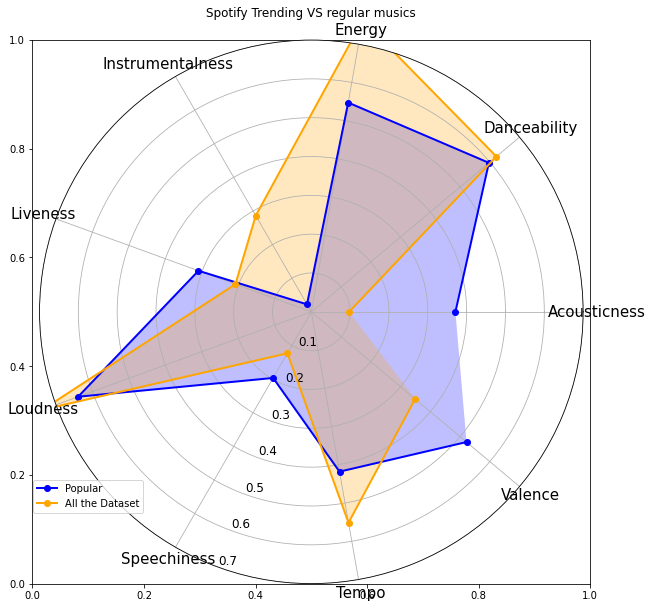

In [12]:
labels = list(feature_spoitfy_norm)[:]
features = feature_spoitfy_norm.mean().tolist()
features_all = feature_all_normalized.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# used for self-check 
fig, ax = plt.subplots(figsize=(10,10)) 
ax = fig.add_subplot(111, polar=True)

# used for presenting 
#ax = fig.add_subplot(424, polar=True)  
#fig, ax = plt.subplots(figsize=(30,30)) 

ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 15)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Spotify Trending VS regular musics')

plt.legend(loc='best', bbox_to_anchor=(0.2, 0.2))
plt.show()

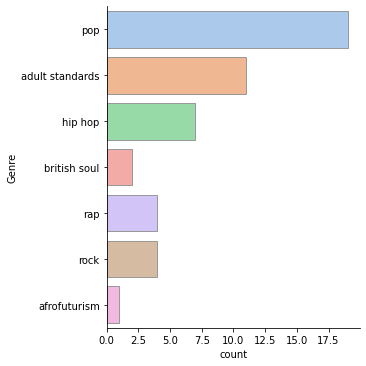

In [13]:
#Catplot
#It gives count of genre in spotify top 50 list. 
sns.catplot(y = "Genre", kind = "count",
            palette = "pastel", edgecolor = ".6",
            data = spotify_norm)
plt.show()

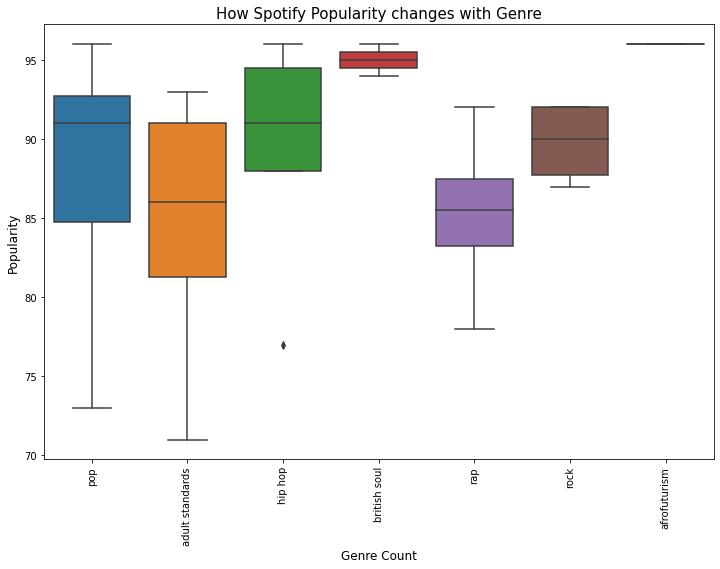

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Genre", y="Popularity", data=spotify_norm)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel('Genre Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How Spotify Popularity changes with Genre", fontsize=15)
plt.show()
#plt.savefig('spotify box plot.png')

In [15]:
spotify_norm.head(10)

,Name,Album,Artist,Release_date,Length,Popularity,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Genre
0,I Hate U,I Hate U,SZA,2021-12-03,174000.0,87.0,5.0,0.550785,0.464506,0.308725,0.000000,0.174676,0.485430,0.420146,0.293638,0.370820,pop
1,Rockin' Around The Christmas Tree,Merry Christmas From Brenda Lee,Brenda Lee,1964-10-19,126266.0,92.0,4.0,0.667167,0.547840,0.421477,0.000000,1.000000,0.562168,0.072896,0.000000,0.921778,adult standards
2,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,212352.0,91.0,4.0,0.023365,0.782407,0.715436,0.000000,0.044296,0.660562,0.129225,0.616093,0.914976,hip hop
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pop
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106.0,96.0,4.0,0.177708,0.157407,0.629530,0.000000,0.092771,0.655621,0.033797,0.617475,0.300533,british soul
5,Easy On Me,30,Adele,2021-11-19,224694.0,92.0,4.0,0.628011,0.570988,0.279195,0.000000,0.222733,0.651551,0.000000,0.555845,0.051128,pop
6,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,238805.0,93.0,4.0,0.477910,0.813272,0.492617,0.000019,0.137275,0.696534,0.219351,0.101633,0.505725,hip hop
7,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,141805.0,93.0,4.0,0.040985,0.550926,0.813423,0.000000,0.160050,0.799433,0.066600,0.763563,0.445641,adult standards
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult standards
9,It's the Most Wonderful Time of the Year,The Andy Williams Christmas Album,Andy Williams,1963,151000.0,73.0,3.0,0.946703,0.000000,0.493960,0.000007,0.199749,0.350919,0.042744,1.000000,0.639497,pop


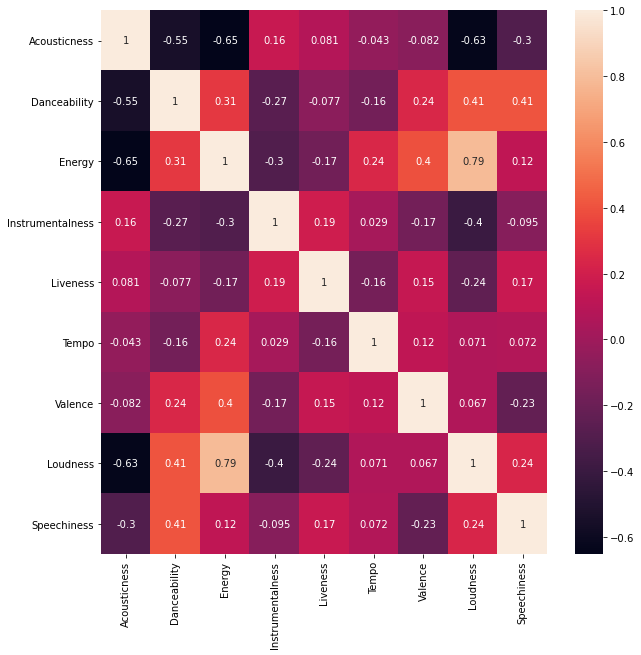

In [16]:
corr = spotify_norm[["Acousticness","Danceability","Energy", "Instrumentalness", 
           "Liveness","Tempo", "Valence", "Loudness", "Speechiness"]].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

## Tiktok Analysis

In [17]:
## normalize tiktok trending data 
feature_tiktok_norm = get_feature(tiktok)
tiktok_norm = normalizer(tiktok)

## combing similar genre 
genre_list_tiktok = genre_cluster(tiktok_norm)
tiktok_norm       = genre_list_to_dataframe(genre_list_tiktok,tiktok_norm)

## name all the blank genre 'Unknown'
#Unknown_Genre_Detector(tiktok_norm['Genre'])

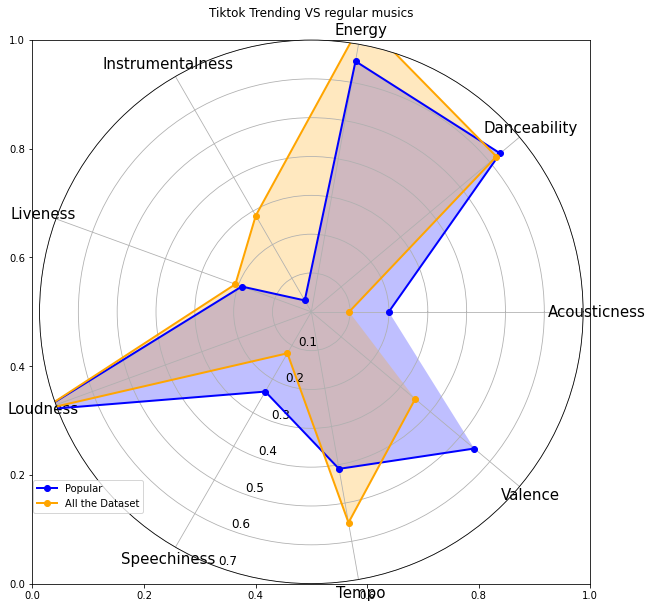

In [18]:
labels = list(feature_tiktok_norm)[:]
features = feature_tiktok_norm.mean().tolist()
features_all = feature_all_normalized.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# used for self-check 
fig, ax = plt.subplots(figsize=(10,10)) 
ax = fig.add_subplot(111, polar=True)

# used for presenting 
#ax = fig.add_subplot(424, polar=True)  
#fig, ax = plt.subplots(figsize=(30,30)) 

ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 15)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Tiktok Trending VS regular musics')

plt.legend(loc='best', bbox_to_anchor=(0.2, 0.2))
plt.show()

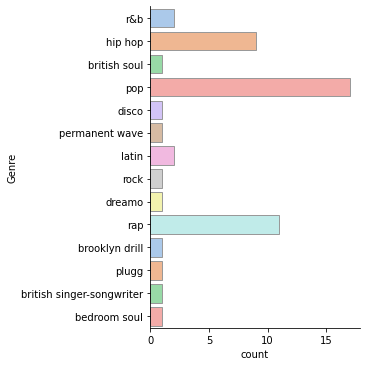

In [19]:
#Catplot
#It gives count of genre in spotify top 50 list. 
sns.catplot(y = "Genre", kind = "count",
            palette = "pastel", edgecolor = ".6",
            data = tiktok_norm[0:50])
plt.show()

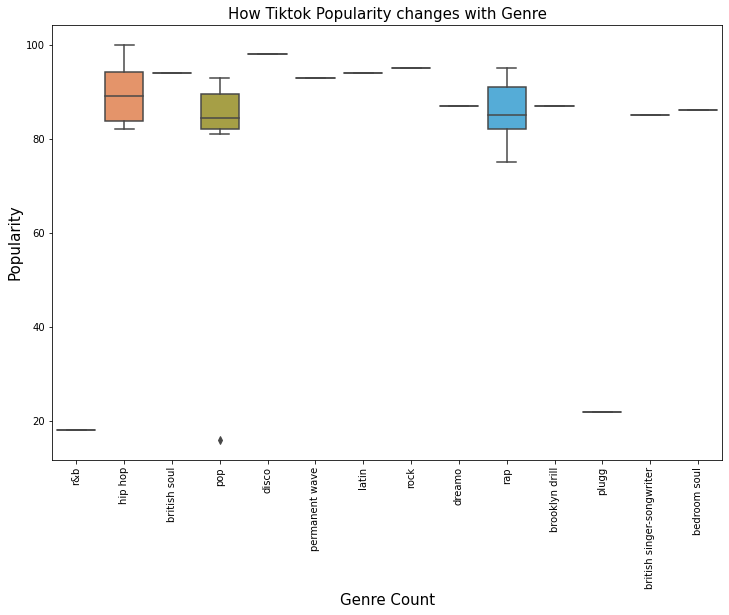

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Genre", y="Popularity", data=tiktok_norm[0:50])
plt.ylabel('Popularity', fontsize=15)
plt.xlabel('Genre Count', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("How Tiktok Popularity changes with Genre", fontsize=15)
plt.show()
#plt.savefig('Tiktok Box Plot.png')

## Billboard Analysis

In [21]:
## normalize tiktok trending data 
feature_bill_norm = get_feature(billboard)
bill_norm = normalizer(billboard)

## combing similar genre 
genre_list_bill = genre_cluster(bill_norm)
bill_norm       = genre_list_to_dataframe(genre_list_bill,bill_norm)

## name all the blank genre 'Unknown'
#Unknown_Genre_Detector(bill_norm['Genre'])

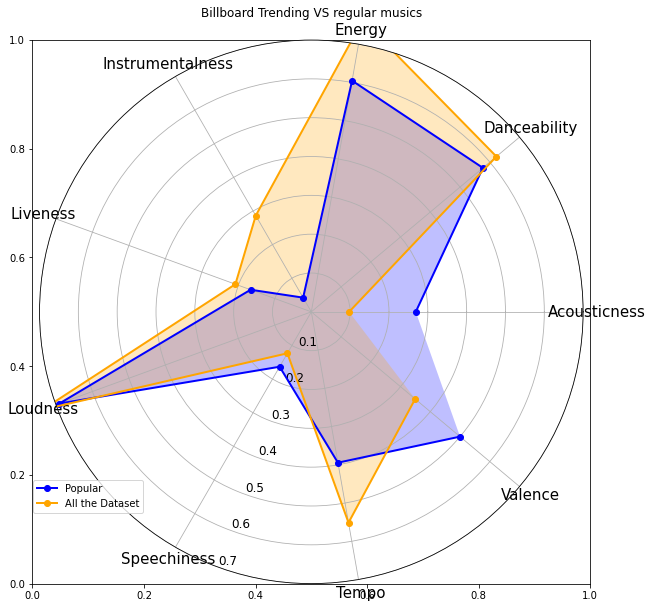

In [22]:
labels = list(feature_bill_norm)[:]

features = feature_bill_norm.mean().tolist()
features_all = feature_all_normalized.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# used for self-check 
fig, ax = plt.subplots(figsize=(10,10)) 
ax = fig.add_subplot(111, polar=True)

# used for presenting 
#ax = fig.add_subplot(424, polar=True)  
#fig, ax = plt.subplots(figsize=(30,30)) 

ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 15)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Billboard Trending VS regular musics')

plt.legend(loc='best', bbox_to_anchor=(0.2, 0.2))
plt.show()

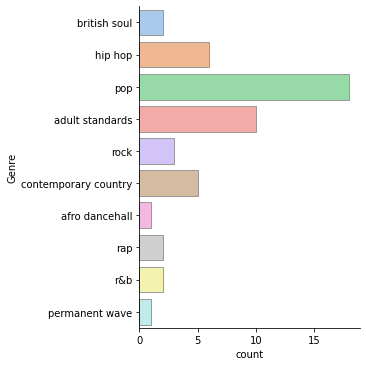

In [23]:
#Catplot
#It gives count of genre in spotify top 50 list. 
sns.catplot(y = "Genre", kind = "count",
            palette = "pastel", edgecolor = ".6",
            data = bill_norm[0:50])
plt.show()

In [24]:
bill_norm.Genre

0        british soul
1             hip hop
2                 pop
3     adult standards
4             hip hop
           ...       
95                NaN
96                NaN
97                NaN
98                NaN
99                NaN
Name: Genre, Length: 100, dtype: object

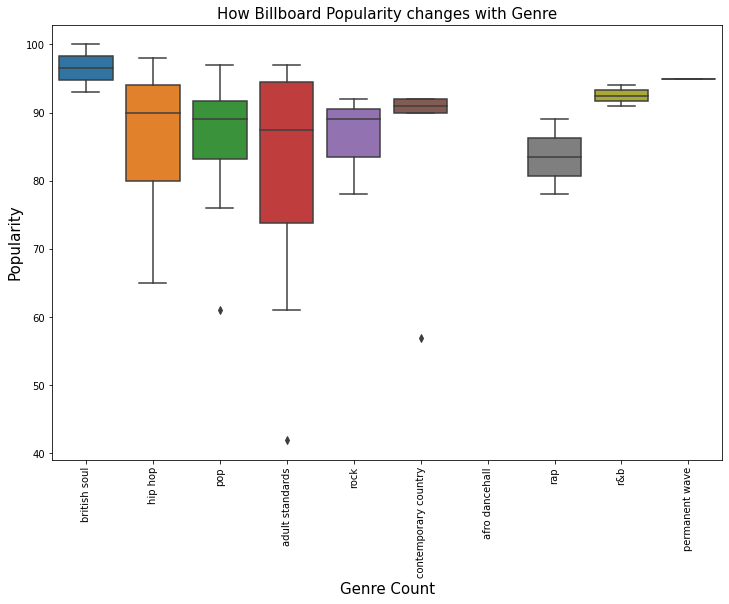

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Genre", y="Popularity", data=bill_norm[0:50])
plt.ylabel('Popularity', fontsize=15)
plt.xlabel('Genre Count', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("How Billboard Popularity changes with Genre", fontsize=15)
plt.show()
#plt.savefig('Billboard Box Plot.png')

## Time Series Analysis

In [26]:
## match the features name 
time_series.rename(columns=dict, inplace=True)

In [27]:
## get all features for anaysis 
feature_time = time_series[time_series.columns[[0,2,4,7,9,10,15,16,17]]]

In [28]:
## normalization 
feature_time_norm = (feature_time-feature_time.min())/(feature_time.max()-feature_time.min()) 
feature_time_norm = pd.concat([time_series[time_series.columns[[-1,-6]]],feature_time_norm], axis=1)

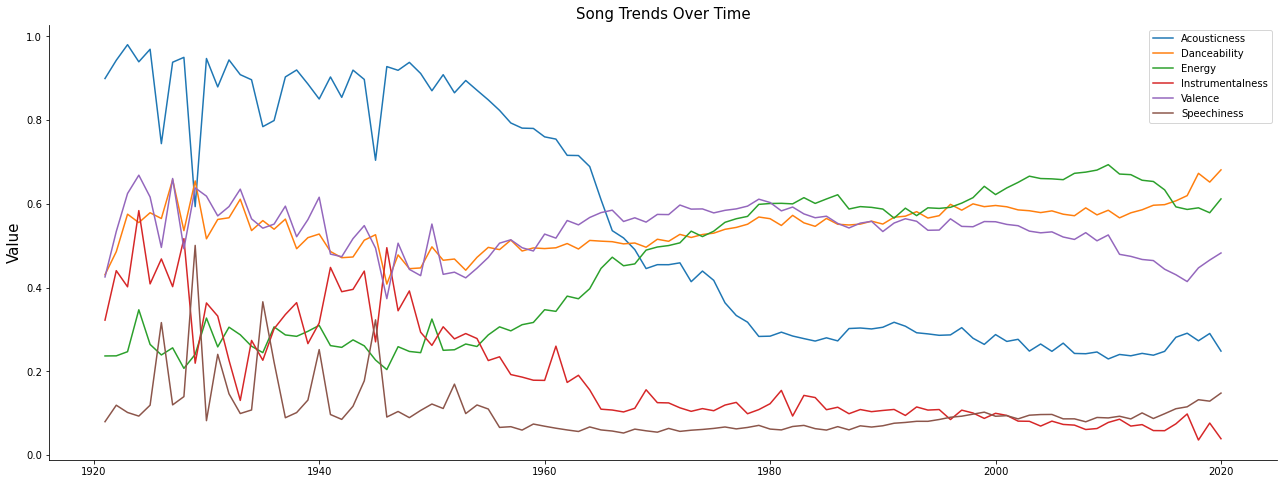

In [29]:
# Time Series Analysis 
fig, ax = plt.subplots(figsize=(22,8)) 

ax.set_title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["Acousticness","Danceability","Energy", 
         "Instrumentalness", "Valence", "Speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=feature_time_norm.groupby('year').mean())
    
sns.despine(ax=ax)
    
ax.set_ylabel("Value", fontdict={'fontsize':15})
ax.set(xlabel=None)
plt.legend(lines)
plt.show()
#plt.savefig("time series.png")

In [30]:
#bucketing
year_list = sorted(list(time_series['year'].unique()))
res = pd.cut(time_series['year'],10,labels=['1921-31','1931-41','1941-51','1951-61','1961-71','1971-81','1981-91','1991-01','2001-11','2011-2020'])
time_series['decade'] = res 
time_series.head(2)

,Acousticness,artists,Danceability,duration_ms,Energy,explicit,id,Instrumentalness,key,Liveness,Loudness,mode,name,popularity,release_date,Speechiness,Tempo,Valence,year,decade
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,1921-31
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,1921-31


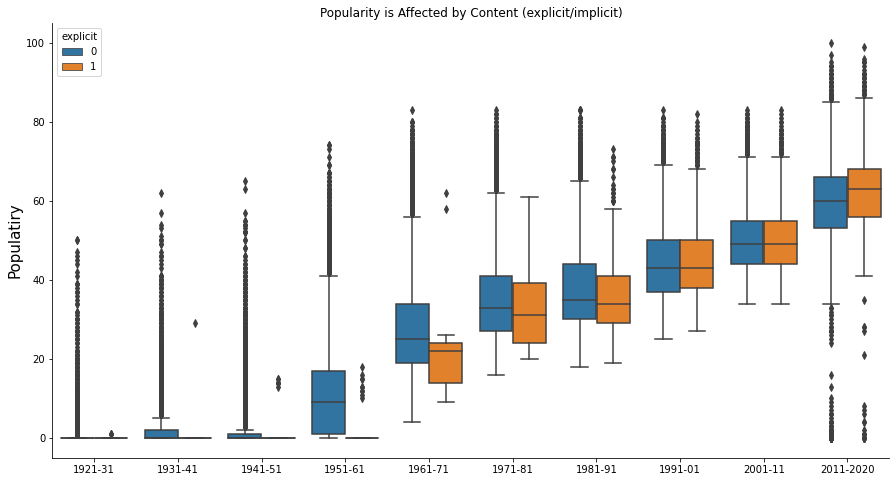

In [31]:
fig, ax = plt.subplots(figsize=(15,8)) 

sns.boxplot(x='decade',y='popularity',hue = 'explicit',data=time_series[['explicit','popularity','decade']])
ax.set_title('Popularity is Affected by Content (explicit/implicit)')
ax.set_ylabel('Populatiry', fontdict={'fontsize':'15'})
ax.set(xlabel=None)
sns.despine(ax = ax)
plt.show()
#plt.savefig('explicit.png')

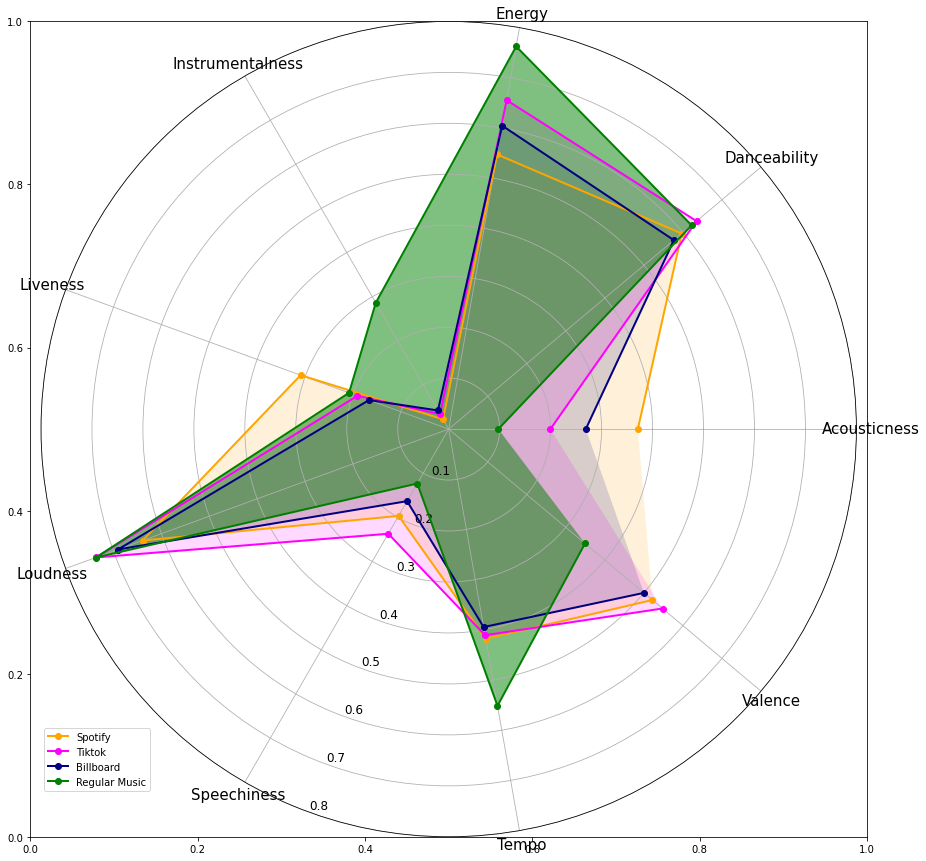

In [32]:
# comparing all trend music from 3 music platforms with regular music 

labels = list(feature_spoitfy_norm)[:]

spotify_plot   = feature_spoitfy_norm.mean().tolist()
features_all   = feature_all_normalized.mean().tolist()
tiktok_plot    = feature_tiktok_norm.mean().tolist()
billboard_lpot = feature_bill_norm.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# used for self-check 
fig, ax = plt.subplots(figsize=(15,15)) 
ax = fig.add_subplot(111, polar=True)

# used for presenting 

#fig, ax = plt.subplots(figsize=(50,50)) 
#ax = fig.add_subplot(324, polar=True)    # 424

# Spotify
ax.plot(angles, spotify_plot, 'o-', linewidth=2, label = "Spotify", color= 'orange')
ax.fill(angles, spotify_plot, alpha=0.15, facecolor='orange')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 15)

# Tiktok 
ax.plot(angles, tiktok_plot, 'o-', linewidth=2, label = "Tiktok", color= 'fuchsia')  
ax.fill(angles, tiktok_plot, alpha=0.15, facecolor='fuchsia')


# Billboard
ax.plot(angles, billboard_lpot, 'o-', linewidth=2, label = "Billboard", color= 'navy')
ax.fill(angles, billboard_lpot, alpha=0.15, facecolor='navy')

# ALL SONGS
ax.plot(angles, features_all, 'o-', linewidth=2, label = "Regular Music", color= 'green')
ax.fill(angles, features_all, alpha=0.5, facecolor='green')
#ax.set_title('Trending Music vs. Regular Musics', fontsize = 15)

ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8' ], size=12)
plt.ylim(0,0.8)

plt.legend(loc='best', bbox_to_anchor=(0.14, 0.14))
plt.show()